In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
# 데이터 불러오기
loan_spec_log = pd.read_csv('/Users/sungahwang/Desktop/BigContest_data/loan_spec_log.csv')
loan_spec_log

,application_id,bank_id,product_id,loan_limit,loan_rate,is_applied,weekday,loanapply_insert_hour,user_id,gender,...,existing_loan_cnt,existing_loan_amt,reage,career,credit_grade,spec_clust,action_cnt,use_day_cnt,first_event,timeout_sum(s)
0,1748340,7,191,42000000.0,13.6,NaN,Tuesday,13,430982.0,1.0,...,2.0,15000000.0,20.0,1.0,7.0,2.0,176.0,17.0,EndLoanApply,201.0
1,1748340,25,169,24000000.0,17.9,NaN,Tuesday,13,430982.0,1.0,...,2.0,15000000.0,20.0,1.0,7.0,2.0,176.0,17.0,EndLoanApply,201.0
2,1748340,2,7,24000000.0,18.5,NaN,Tuesday,13,430982.0,1.0,...,2.0,15000000.0,20.0,1.0,7.0,2.0,176.0,17.0,EndLoanApply,201.0
3,1748340,4,268,29000000.0,10.8,NaN,Tuesday,13,430982.0,1.0,...,2.0,15000000.0,20.0,1.0,7.0,2.0,176.0,17.0,EndLoanApply,201.0
4,1748340,11,118,5000000.0,16.4,NaN,Tuesday,13,430982.0,1.0,...,2.0,15000000.0,20.0,1.0,7.0,2.0,176.0,17.0,EndLoanApply,201.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13525488,1969227,2,7,30000000.0,13.6,0.0,Monday,14,109899.0,1.0,...,9.0,107000000.0,40.0,2.0,7.0,4.0,178.0,27.0,EndLoanApply,350.0
13525489,1969227,33,110,9000000.0,14.4,0.0,Monday,14,109899.0,1.0,...,9.0,107000000.0,40.0,2.0,7.0,4.0,178.0,27.0,EndLoanApply,350.0
13525490,1969227,50,142,3000000.0,11.2,0.0,Monday,14,109899.0,1.0,...,9.0,107000000.0,40.0,2.0,7.0,4.0,178.0,27.0,EndLoanApply,350.0
13525491,1969227,22,100,4000000.0,15.3,0.0,Monday,14,109899.0,1.0,...,9.0,107000000.0,40.0,2.0,7.0,4.0,178.0,27.0,EndLoanApply,350.0


In [24]:
clust = loan_spec_log[['spec_clust', 'bank_id', 'product_id']]
clust.head(3)

,spec_clust,bank_id,product_id
0,2.0,7,191
1,2.0,25,169
2,2.0,2,7


In [25]:
clust.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13525493 entries, 0 to 13525492
Data columns (total 3 columns):
 #   Column      Dtype  
---  ------      -----  
 0   spec_clust  float64
 1   bank_id     int64  
 2   product_id  int64  
dtypes: float64(1), int64(2)
memory usage: 309.6 MB


# K-Means (걍 수치 취급 함)

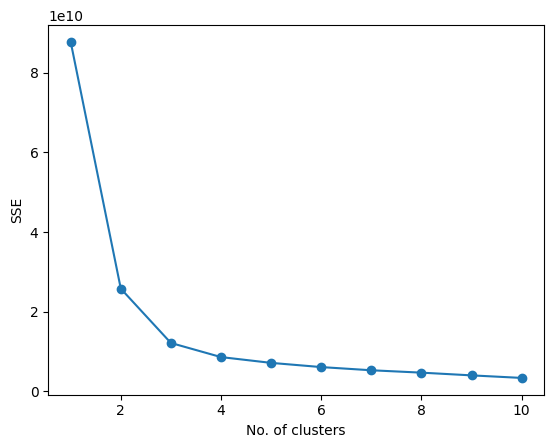

In [5]:
from sklearn.cluster import KMeans

def elbow(X):
  sse = []
  for i in range(1,11):  
    km = KMeans(n_clusters=i, init='k-means++', random_state = 0)
    km.fit(X)
    sse.append(km.inertia_)
  
  plt.plot(range(1,11), sse, marker ='o')
  plt.xlabel('No. of clusters')
  plt.ylabel('SSE')
  plt.show()

elbow(clust)

## 3

In [12]:
clust['spec_clust'] = clust['spec_clust'].astype(str)

/var/folders/8s/_473l8ss1hx20zy1txdh03x40000gn/T/ipykernel_51387/1027929861.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clust['spec_clust'] = clust['spec_clust'].astype(str)


In [16]:
clust = pd.get_dummies(clust)

In [18]:
model = KMeans(n_clusters=3)
model.fit(clust)

KMeans(n_clusters=3)

In [19]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca_transformed = pca.fit_transform(clust)

clust['pca_x'] = pca_transformed[:,0]
clust['pca_y'] = pca_transformed[:,1]
clust.head(3)

,bank_id,product_id,spec_clust_0.0,spec_clust_1.0,spec_clust_2.0,spec_clust_3.0,spec_clust_4.0,pca_x,pca_y
0,7,191,0,0,1,0,0,-43.748222,-27.008052
1,25,169,0,0,1,0,0,-22.332863,-8.316281
2,2,7,0,0,1,0,0,140.317668,-26.143355


In [20]:
clust['cluster']= model.labels_

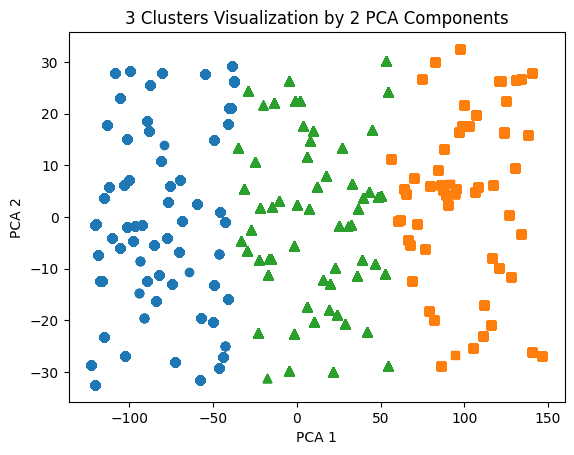

In [21]:
marker0_ind = clust[clust['cluster']==0].index
marker1_ind = clust[clust['cluster']==1].index
marker2_ind = clust[clust['cluster']==2].index

# cluster값 0, 1, 2에 해당하는 Index로 각 cluster 레벨의 pca_x, pca_y 값 추출. o, s, ^ 로 marker 표시
plt.scatter(x=clust.loc[marker0_ind,'pca_x'], y=clust.loc[marker0_ind,'pca_y'], marker='o') 
plt.scatter(x=clust.loc[marker1_ind,'pca_x'], y=clust.loc[marker1_ind,'pca_y'], marker='s')
plt.scatter(x=clust.loc[marker2_ind,'pca_x'], y=clust.loc[marker2_ind,'pca_y'], marker='^')

plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.title('3 Clusters Visualization by 2 PCA Components')
plt.show()

0 5275572
2 4461267
1 3788654


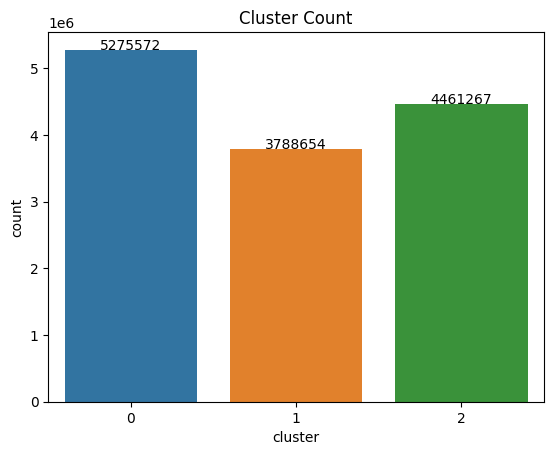

In [22]:
ax=sns.countplot(x=clust.cluster)
for index, row in pd.DataFrame(clust['cluster'].value_counts()).iterrows():
    ax.text(index,row.values[0], str(round(row.values[0])),color='black', ha="center")
    print(index,row.values[0])
plt.title('Cluster Count')
plt.show()

# K-Modes (범주형 군집분석 방법)

In [63]:
clust = loan_spec_log[['spec_clust', 'bank_id', 'product_id']]
clust.head(3)

,spec_clust,bank_id,product_id
0,2.0,7,191
1,2.0,25,169
2,2.0,2,7


In [64]:
clust['spec_clust'] = clust['spec_clust'].astype(str)

/var/folders/8s/_473l8ss1hx20zy1txdh03x40000gn/T/ipykernel_52909/1027929861.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clust['spec_clust'] = clust['spec_clust'].astype(str)


In [65]:
clust['bank_id'] = clust['bank_id'].astype(str)

/var/folders/8s/_473l8ss1hx20zy1txdh03x40000gn/T/ipykernel_52909/847526272.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clust['bank_id'] = clust['bank_id'].astype(str)


In [66]:
clust['product_id'] = clust['product_id'].astype(str)

/var/folders/8s/_473l8ss1hx20zy1txdh03x40000gn/T/ipykernel_52909/3667646038.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clust['product_id'] = clust['product_id'].astype(str)


In [67]:
clust.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13525493 entries, 0 to 13525492
Data columns (total 3 columns):
 #   Column      Dtype 
---  ------      ----- 
 0   spec_clust  object
 1   bank_id     object
 2   product_id  object
dtypes: object(3)
memory usage: 309.6+ MB


In [10]:
from kmodes.kmodes import KModes

##

In [79]:
cost = []
K = range(1,10)
for num_clusters in list(K):
    kmode = KModes(n_clusters=num_clusters, init = "random", n_init = 2, verbose=True)
    kmode.fit_predict(clust)
    cost.append(kmode.cost_)

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 0, cost: 34367776.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 0, cost: 34367776.0
Best run was number 1
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 220327, cost: 31460029.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 0, cost: 33835299.0
Best run was number 1
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 506713, cost: 29354215.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 295220, cost: 29264214.0
Run 2, iteration: 2/100, moves: 275649, cost: 29185646.0
Run 2, iteration: 3/100, moves: 179217, cost: 29185646.0
Best run was number 2
Init: initial

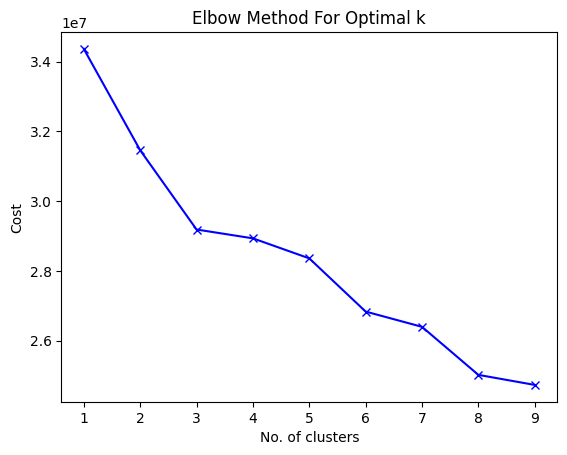

In [80]:
plt.plot(K, cost, 'bx-')
plt.xlabel('No. of clusters')
plt.ylabel('Cost')
plt.title('Elbow Method For Optimal k')
plt.show()

##

In [50]:
kmode = KModes(n_clusters=6, init = "random", n_init = 5, verbose=1)
kmode.fit_predict(clust)

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 2064916, cost: 28429437.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 344007, cost: 27190153.0
Run 2, iteration: 2/100, moves: 4543, cost: 27190153.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, iteration: 1/100, moves: 2542713, cost: 26762823.0
Run 3, iteration: 2/100, moves: 361991, cost: 26629672.0
Run 3, iteration: 3/100, moves: 9208, cost: 26629672.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 4, iteration: 1/100, moves: 710495, cost: 26513195.0
Run 4, iteration: 2/100, moves: 1428, cost: 26513195.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 5, iteration: 1/100, moves: 813467, cost: 28369241.0
Run 5, iteration: 2/100, moves: 76158, cost: 28369241.0
Best run was number 4


array([4, 4, 4, ..., 0, 0, 0], dtype=uint16)

In [51]:
labels  = kmode.labels_

In [52]:
loan_spec_log['cluster2'] = labels

In [53]:
loan_spec_log

,application_id,bank_id,product_id,loan_limit,loan_rate,is_applied,weekday,loanapply_insert_hour,user_id,gender,...,existing_loan_amt,reage,career,credit_grade,spec_clust,action_cnt,use_day_cnt,first_event,timeout_sum(s),cluster2
0,1748340,7,191,42000000.0,13.6,NaN,Tuesday,13,430982.0,1.0,...,15000000.0,20.0,1.0,7.0,2.0,176.0,17.0,EndLoanApply,201.0,4
1,1748340,25,169,24000000.0,17.9,NaN,Tuesday,13,430982.0,1.0,...,15000000.0,20.0,1.0,7.0,2.0,176.0,17.0,EndLoanApply,201.0,4
2,1748340,2,7,24000000.0,18.5,NaN,Tuesday,13,430982.0,1.0,...,15000000.0,20.0,1.0,7.0,2.0,176.0,17.0,EndLoanApply,201.0,4
3,1748340,4,268,29000000.0,10.8,NaN,Tuesday,13,430982.0,1.0,...,15000000.0,20.0,1.0,7.0,2.0,176.0,17.0,EndLoanApply,201.0,4
4,1748340,11,118,5000000.0,16.4,NaN,Tuesday,13,430982.0,1.0,...,15000000.0,20.0,1.0,7.0,2.0,176.0,17.0,EndLoanApply,201.0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13525488,1969227,2,7,30000000.0,13.6,0.0,Monday,14,109899.0,1.0,...,107000000.0,40.0,2.0,7.0,4.0,178.0,27.0,EndLoanApply,350.0,0
13525489,1969227,33,110,9000000.0,14.4,0.0,Monday,14,109899.0,1.0,...,107000000.0,40.0,2.0,7.0,4.0,178.0,27.0,EndLoanApply,350.0,2
13525490,1969227,50,142,3000000.0,11.2,0.0,Monday,14,109899.0,1.0,...,107000000.0,40.0,2.0,7.0,4.0,178.0,27.0,EndLoanApply,350.0,0
13525491,1969227,22,100,4000000.0,15.3,0.0,Monday,14,109899.0,1.0,...,107000000.0,40.0,2.0,7.0,4.0,178.0,27.0,EndLoanApply,350.0,0


In [55]:
cluster1 = loan_spec_log[loan_spec_log['cluster2']==0]
cluster2 = loan_spec_log[loan_spec_log['cluster2']==1]
cluster3 = loan_spec_log[loan_spec_log['cluster2']==2]
cluster4 = loan_spec_log[loan_spec_log['cluster2']==3]
cluster5 = loan_spec_log[loan_spec_log['cluster2']==4]

1 5054843
0 3646734
3 2591461
4 1586960
2 426900
5 218595


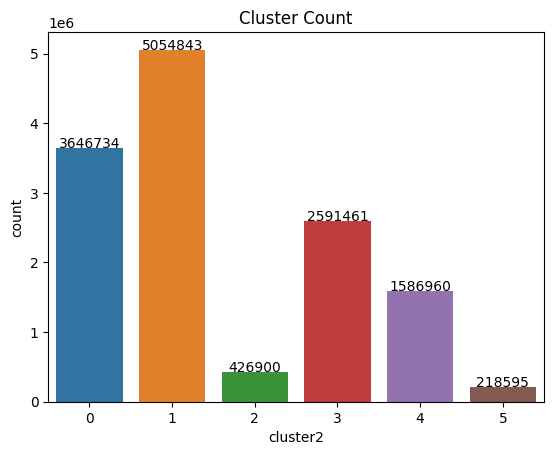

In [58]:
ax=sns.countplot(x=loan_spec_log.cluster2)
for index, row in pd.DataFrame(loan_spec_log['cluster2'].value_counts()).iterrows():
    ax.text(index,row.values[0], str(round(row.values[0])),color='black', ha="center")
    print(index,row.values[0])
plt.title('Cluster Count')
plt.show()

In [59]:
loan_spec_log.to_csv("merge.csv", index = False)

## init 종류 바꿔서,,

In [31]:
cost = []
K = range(1,13)
for num_clusters in list(K):
    kmode = KModes(n_clusters=num_clusters, max_iter = 100, init = "Cao", n_init = 5, verbose=True)
    kmode.fit_predict(clust)
    cost.append(kmode.cost_)

Initialization method and algorithm are deterministic. Setting n_init to 1.
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 0, cost: 34367776.0
Initialization method and algorithm are deterministic. Setting n_init to 1.
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 0, cost: 33508289.0
Initialization method and algorithm are deterministic. Setting n_init to 1.
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 0, cost: 32757555.0
Initialization method and algorithm are deterministic. Setting n_init to 1.
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 0, cost: 32054541.0
Initialization method and algorithm are deterministic. Setting n_init to 1.
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, itera

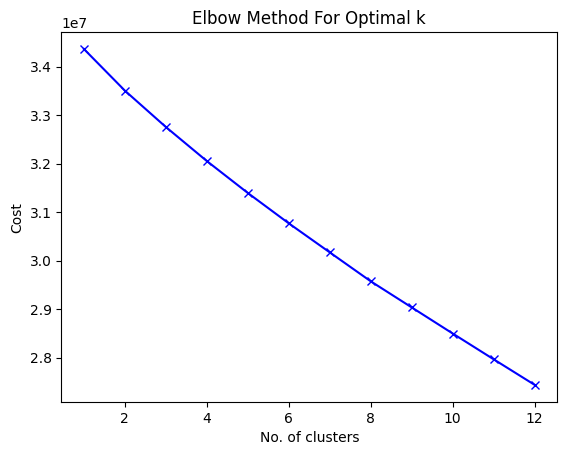

In [32]:
plt.plot(K, cost, 'bx-')
plt.xlabel('No. of clusters')
plt.ylabel('Cost')
plt.title('Elbow Method For Optimal k')
plt.show()

ㅋㅋㅋㅋㅋㅋ